In [80]:
# import urllib2
from bs4 import BeautifulSoup
import requests
from requests import get
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import datetime as dt
import string
from matplotlib import pyplot as plt
sns.set(style="ticks")

import nltk
from nltk.stem.snowball import SnowballStemmer 
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import os
import codecs
from sklearn import feature_extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet as wn


pd.set_option('display.notebook_repr_html', True)
sns.set(style="ticks")
%matplotlib inline


import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

sns.set_context('poster') 


The First part will be to collect all the imdb ids of the top 250 movies. We have done this by scrapping imdb's webpage.

In [14]:
url='http://www.imdb.com/chart/top'
page=get(url).content
soup=BeautifulSoup(page,'html.parser')
class_=soup.find_all(name='div',attrs={'class':'wlb_ribbon'})
movie_ids=[c['data-tconst'] for c in class_]

The movie_ids is a list of the top 250 movie ids of imdb.

We will be using omdb for data collection. The data will be collected from omdb's api.

In [27]:
movie_info=[[] for i in range(len(movie_ids))]

for i in range(250):
    url='http://www.omdbapi.com/?i='
    r=requests.get(url+movie_ids[i]+"&apikey=de12b217").json()
    for a in r.keys():
        movie_info[i].append(r[a])
        
df_omdb=pd.DataFrame(movie_info,columns=r.keys())

In [29]:
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 29 n...,https://ia.media-imdb.com/images/M/MV5BMDFkYTc...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"1,929,977",tt0111161,movie,27 Jan 1998,N/A,Columbia Pictures,N/A,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 24 wins & 28 nominations.,https://ia.media-imdb.com/images/M/MV5BY2Q2NzQ...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,325,871",tt0068646,movie,09 Oct 2001,N/A,Paramount Pictures,http://www.thegodfather.com,True
2,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://ia.media-imdb.com/images/M/MV5BMjZiNzI...,"[{'Source': 'Internet Movie Database', 'Value'...",85,9.0,"916,505",tt0071562,movie,24 May 2005,N/A,Paramount Pictures,http://www.thegodfather.com/,True
3,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 152 wins & 155 nominations.,https://ia.media-imdb.com/images/M/MV5BMTMxNTM...,"[{'Source': 'Internet Movie Database', 'Value'...",82,9.0,"1,911,376",tt0468569,movie,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True
4,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,https://ia.media-imdb.com/images/M/MV5BMWU4N2F...,"[{'Source': 'Internet Movie Database', 'Value'...",96,8.9,"532,915",tt0050083,movie,06 Mar 2001,N/A,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men,True


Now we have collected all of the information from the omdb database. To get a more richer dataset of movies we will now try to get the database from imdb.

In [30]:
url='http://www.imdb.com/title/'
t='/plotsummary?ref_=tt_stry_pl'
plot=[[] for i in range(len(movie_ids))]
for i in range(250):
    page=get(url+df_omdb.imdbID[i]+t).content
    soup=BeautifulSoup(page,'html.parser')
    class_=soup.find_all(name='li',attrs={'class':'ipl-zebra-list__item'})
    for j in class_:
        plot[i].append(j.get_text(strip = True))


In [31]:
df_omdb['Plot']=plot
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",[Chronicles the experiences of a formerly succ...,English,USA,Nominated for 7 Oscars. Another 19 wins & 29 n...,https://ia.media-imdb.com/images/M/MV5BMDFkYTc...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"1,929,977",tt0111161,movie,27 Jan 1998,N/A,Columbia Pictures,N/A,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...","Marlon Brando, Al Pacino, James Caan, Richard ...",[When the aging head of a famous crime family ...,"English, Italian, Latin",USA,Won 3 Oscars. Another 24 wins & 28 nominations.,https://ia.media-imdb.com/images/M/MV5BY2Q2NzQ...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,325,871",tt0068646,movie,09 Oct 2001,N/A,Paramount Pictures,http://www.thegodfather.com,True
2,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",[The continuing saga of the Corleone crime fam...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://ia.media-imdb.com/images/M/MV5BMjZiNzI...,"[{'Source': 'Internet Movie Database', 'Value'...",85,9.0,"916,505",tt0071562,movie,24 May 2005,N/A,Paramount Pictures,http://www.thegodfather.com/,True
3,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",[Set within a year after the events of Batman ...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 152 wins & 155 nominations.,https://ia.media-imdb.com/images/M/MV5BMTMxNTM...,"[{'Source': 'Internet Movie Database', 'Value'...",82,9.0,"1,911,376",tt0468569,movie,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True
4,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",[The defense and the prosecution have rested a...,English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,https://ia.media-imdb.com/images/M/MV5BMWU4N2F...,"[{'Source': 'Internet Movie Database', 'Value'...",96,8.9,"532,915",tt0050083,movie,06 Mar 2001,N/A,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men,True


### Cleaning the dataset


First step in cleaning the data is to convert Year to a categorical variable. Year 1990 was chosen as a suitable cutoff. Movies released before 1990 became 0 and after 1990 became 1. After doing this we performed one hot encoding and added dummy variables of Year(now 0,1) in the dataframe.

In [32]:
df_omdb.Year=pd.to_numeric(df_omdb.Year)
for i in range(250):
    if df_omdb.Year[i]<1990:
        df_omdb.Year[i]=0
    else:
        df_omdb.Year[i]=1
dummy_year=pd.get_dummies(df_omdb.Year)

for i in range(250):
    df_omdb.Runtime[i]=df_omdb.Runtime[i].split()[0]

C:\Users\musta\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\musta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\musta\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Next step is to convert Runtime to a categorical variable. A Runtime of 125 mins was chosen as a suitable cutoff because it was the median value all datapoints. Movies having a runtime less than 125 mins became 0 and greater than 125 mins became 1.

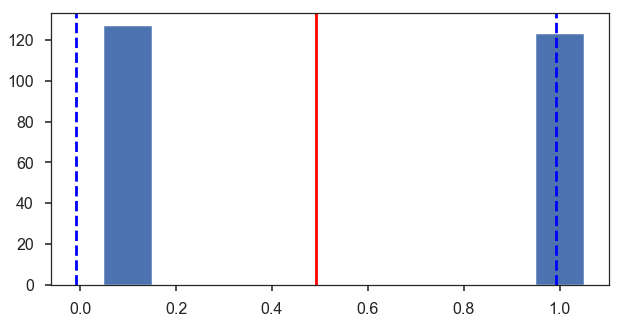

In [326]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.hist(df_omdb['Runtime'],edgecolor='white',align='right')
ax.axvline(x=np.mean(df_omdb['Runtime']),c='r')
ax.axvline(x=np.mean(df_omdb['Runtime'])-np.std(df_omdb['Runtime']),c='b',ls='--')
ax.axvline(x=np.mean(df_omdb['Runtime'])+np.std(df_omdb['Runtime']),c='b',ls='--')
plt.show()

In [325]:
df_omdb['Runtime']=pd.to_numeric(df_omdb['Runtime'],errors='coerce')
for i in range(250):
    if df_omdb.Runtime[i]<=125:
        df_omdb.Runtime[i]=0
    else: 
        df_omdb.Runtime[i]=1
    


C:\Users\musta\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\musta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [33]:
def clean(column_name):
    """This function takes a column from the dataframe and splits two elements
       if they are separated by a comma.
       For ex. in Actors column there might be values such as Christian Bale, Morgan Freeman.
       This will separate these two actors and store them individually in a list."""
    name=set()
    for name_string in df_omdb[column_name]:
        name.update(name_string.split(', '))
    name=sorted(name)
    return name

def top(column_name):
    """This function takes its input as name of the column and returns a sorted list of the 
       elements which occur very frequently in that column in descending order."""
    
    name=clean(column_name)
    dummy_name=pd.DataFrame()
    for n in name:
        dummy_name[n]=[int(n in nm.split(', ')) for nm in df_omdb[column_name]] 
    
    namelist=[n for n in name]
    nlt=dummy_name[namelist].sum()
    nlt=nlt.sort_values(axis=0,ascending=False)
    return nlt.index
    
def plot_column(column_name,n_elem_display=0):
    """ This function is used to plot a bar graph of a column of the dataframe.
        It takes its argument as name of column and number of elements to display and
        return a bar graph of the user defined number of top elements which occur
        frequently in that column."""
    
    name=clean(column_name)
    dummy_name=pd.DataFrame()
    for n in name:
        dummy_name[n]=[int(n in nm.split(', ')) for nm in df_omdb[column_name]] 
    
    namelist=[n for n in name]
    nlt=dummy_name[namelist].sum()
    nlt=nlt.sort_values(axis=0,ascending=False)
    if n_elem_display !=0:
        return nlt[:n_elem_display].plot(kind = "bar",figsize=(10,10))
    else:
        return nlt[:].plot(kind = "bar",figsize=(10,5))
        

Plotting all of the genres

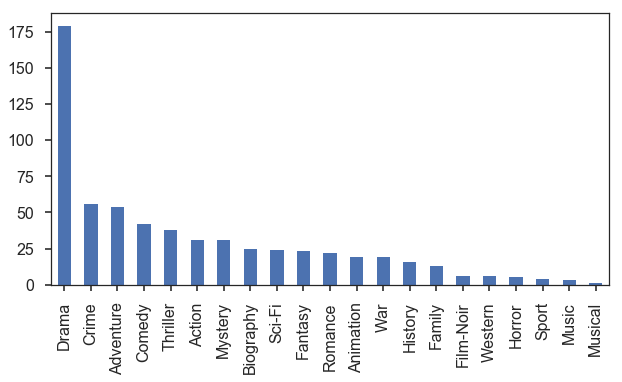

In [34]:
plot_column('Genre')

We will be choosing all of the genres as our predictors in our dataset

In [35]:
#Get the unique genres contained in the dataframe
genres=clean('Genre')
#Add one column for every genre in the dataframe
for genre in genres:
    df_omdb["genre:"+genre] = [int(genre in g.split(', ')) for g in df_omdb.Genre]

In [327]:
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,genre:Action,genre:Adventure,genre:Animation,genre:Biography,genre:Comedy,genre:Crime,genre:Drama,genre:Family,genre:Fantasy,genre:Film-Noir,genre:History,genre:Horror,genre:Music,genre:Musical,genre:Mystery,genre:Romance,genre:Sci-Fi,genre:Sport,genre:Thriller,genre:War,genre:Western,Actor:Robert De Niro,Actor:Harrison Ford,Actor:Leonardo DiCaprio,Actor:Tom Hanks,...,Actor:Christian Bale,Actor:Charles Chaplin,Actor:Mark Hamill,Actor:Joe Pesci,Actor:Sean Astin,Actor:Brad Pitt,Actor:Gunnar Björnstrand,Actor:Marlon Brando,Actor:Ralph Fiennes,Actor:Matt Damon,Actor:Paul Newman,Actor:Toshirô Mifune,Actor:Michael Caine,Actor:Ethan Hawke,Actor:Takashi Shimura,Actor:Bruce Willis,Actor:Steve Buscemi,Actor:Jack Hawkins,Actor:Carrie Fisher,Actor:William Holden,Director:Stanley Kubrick,Director:Christopher Nolan,Director:Martin Scorsese,Director:Steven Spielberg,Director:Alfred Hitchcock,Director:Billy Wilder,Director:Akira Kurosawa,Director:Hayao Miyazaki,Director:Quentin Tarantino,Director:Charles Chaplin,Director:Sergio Leone,Director:Sidney Lumet,Director:Peter Jackson,Director:Clint Eastwood,Director:Ridley Scott,Director:Pete Docter,Director:Denis Villeneuve,Director:Frank Capra,Director:Ethan Coen,Director:David Fincher,Country:USA,Country:UK,Country:France,Country:Germany,Country:Japan,Country:Italy,Country:India,Country:Spain,Country:Canada,Country:Hong Kong
0,The Shawshank Redemption,1,R,14 Oct 1994,1,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",[Chronicles the experiences of a formerly succ...,English,USA,Nominated for 7 Oscars. Another 19 wins & 29 n...,https://ia.media-imdb.com/images/M/MV5BMDFkYTc...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"1,929,977",tt0111161,movie,27 Jan 1998,N/A,Columbia Pictures,N/A,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,The Godfather,0,R,24 Mar 1972,1,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...","Marlon Brando, Al Pacino, James Caan, Richard ...",[When the aging head of a famous crime family ...,"English, Italian, Latin",USA,Won 3 Oscars. Another 24 wins & 28 nominations.,https://ia.media-imdb.com/images/M/MV5BY2Q2NzQ...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,325,871",tt0068646,movie,09 Oct 2001,N/A,Paramount Pictures,http://www.thegodfather.com,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,0,R,20 Dec 1974,1,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",[The continuing saga of the Corleone crime fam...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://ia.media-imdb.com/images/M/MV5BMjZiNzI...,"[{'Source': 'Internet Movie Database', 'Value'...",85,9.0,"916,505",tt0071562,movie,24 May 2005,N/A,Paramount Pictures,http://www.thegodfather.com/,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,The Dark Knight,1,PG-13,18 Jul 2008,1,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",[Set within a year after the events of Batman ...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 152 wins & 155 nominations.,https://ia.media-imdb.com/images/M/MV5BMTMxNTM...,"[{'Source': 'Internet Movie Database', 'Value'...",82,9.0,"1,911,376",tt0468569,movie,

##### Now let us analyze the number of actors that can be used as predictors in our datset

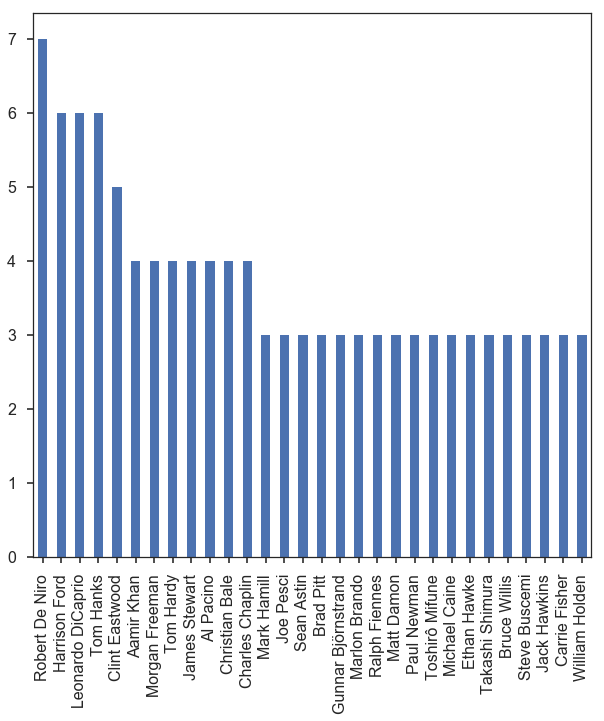

In [37]:
plot_column('Actors',30)

##### Thus, we can take the top 30 actors each having more than 3 movies in the top 250 movie list of imdb.

In [38]:
#Adding actors to our dataset
actors=top('Actors')
actors
for actor in actors[:30]:
    df_omdb["Actor:"+actor] = [int(actor in a.split(', ')) for a in df_omdb.Actors]
        

##### Now let us analyze the directors in our dataset

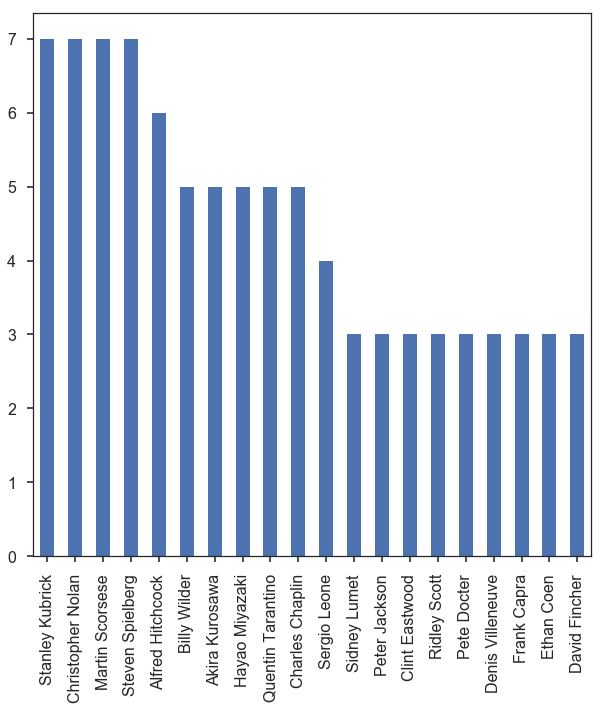

In [39]:
plot_column('Director',20)

##### Thus, we can take the top 20 directors each having more than 3 movies in the top 250 movie list of imdb.

In [40]:
directors=top('Director')
    
for director in directors[:20]:
    df_omdb["Director:"+director] = [int(director in d.split(', ')) for d in df_omdb.Director]    

##### Analyzing whether to take writers or not as predictors.

In [41]:
writers1=set()
writers2=set()
for writer_string in df_omdb.Writer:
    writers1.update(writer_string.split(', '))
for j in writers1:
    writers2.update(j.rsplit(' (')[:1])
writers2 = sorted(writers2)

dummy_writers=pd.DataFrame()

# Add one column for every writer in the dataframe
for writer in writers2:
    dummy_writers[writer] = [int(writer in w.split(', ')) for w in df_omdb.Writer]   
dummy_writers   

,Gamora & Drax),Aaron Guzikowski,Abby Mann,Abhijat Joshi,Adam Elliot,Adolfo Franci,Adolph Green,Adrian Molina,Agatha Christie,Agenore Incrocci,Akhilesh Jaiswal,Akira Kurosawa,Akiva Goldsman,Akiyuki Nosaka,Al Boasberg,Alan Ball,Alan Mak,Albert Hackett,Alec Coppel,Alec Sokolow,Ales Adamovich,Alvin Sargent,Amole Gupte,Amy Poehler,Andrei Tarkovsky,Andrew Kevin Walker,Andrew Knight,Andrew Niccol,Andrew Stanton,Andrey Konchalovskiy,Andy Gaskill,Anthony Burgess,Anthony Tambakis,Anurag Kashyap,Arkadiy Strugatskiy,Arthur C. Clarke,Artur Veeber,Asghar Farhadi,Ashley Montagu,B. Traven,Barry Johnson,Ben Affleck,Bernardo Bertolucci,Bernd Eichinger,Betty Comden,Bill Hader,Bill Lancaster,Billy Wilder,Bo Goldman,Bob Gale,...,Terry George,Terry Gilliam,Terry Jones,Terry Rossio,Terry Southern,Thea von Harbou,Thom Enriquez,Thomas Harris,Thomas Keneally,Thomas Moore,Thomas Narcejac,Thomas Vinterberg,Tobias Lindholm,Tom Ellery,Tom McCarthy,Tom Schulman,Tom Sito,Tony Gilroy,Traudl Junge,Tullio Pinelli,Uma Thurman,Upton Sinclair,Valérie Beaugrand-Champagne,Vanna Paoli,Vidhu Vinod Chopra,Vincenzo Cerami,Vittorio De Sica,W.R. Burnett,Wajdi Mouawad,Walter Donohue,Walter Hill,Wes Anderson,Whit Masterson,William Davies,William Goldman,William Makepeace Thackeray,William Monahan,William Nicholson,William Shakespeare,William Wisher,Winston Groom,Wladyslaw Szpilman,Wolfgang Petersen,Woody Allen,Yasujirô Ozu,Yavuz Turgul,Zaza Urushadze,Zeishan Quadri,Çagan Irmak,Éric Toledano
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Plotting the above writers on a bar graph.

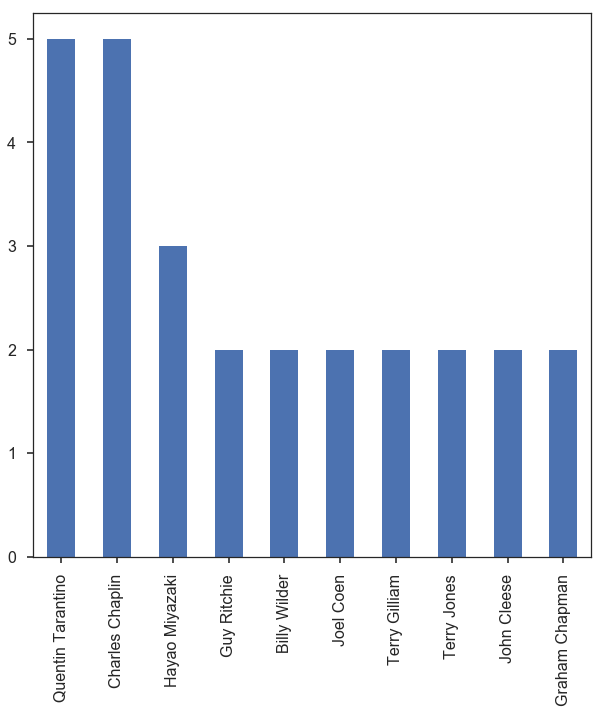

In [42]:
writerlist=[w for w in writers2]
wlt=dummy_writers[writerlist].sum()
wlt=wlt.sort_values(axis=0,ascending=False)
wlt.iloc[0:10].plot(kind = "bar",figsize=(10,10))

Since, not many writers are there having significant number of movies, thus we decided not to take writers as one of our predictors.

Now, we will explore the predictor langugae

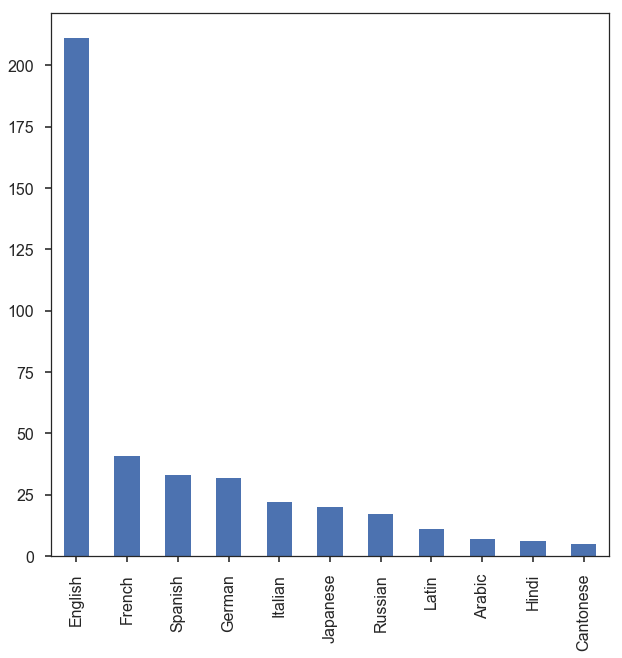

In [43]:
plot_column('Language',11)

Based on the graph we will take the top 11 languages as predictos we decided not to take language as predictor because it does not provide any distinguishing characteristic for clustering

In [44]:
df_omdb.shape

(250, 96)

Now, let us analyze Country of the movie 

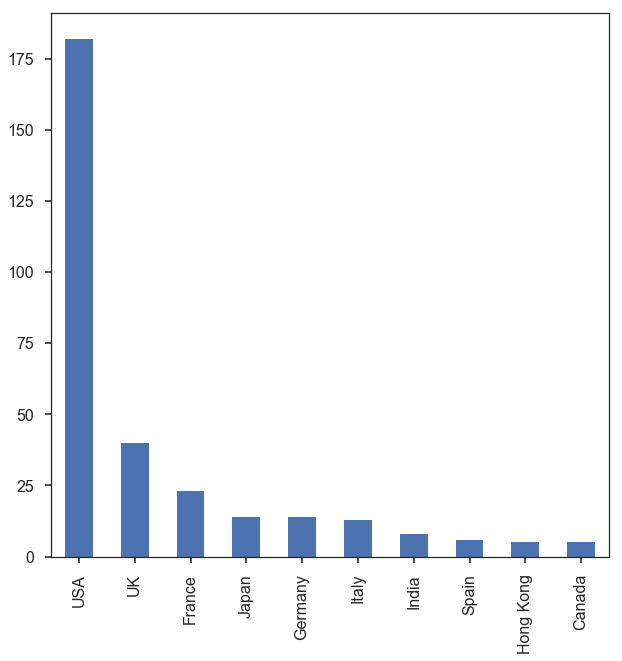

In [21]:
plot_column('Country',10)

We will select the top 10 countries as our predictors

In [45]:
#Adding all of the top 10 countries to our datset
countries=top('Country')

for country in countries[:10]:
    df_omdb["Country:"+country] = [int(country in c.split(', ')) for c in df_omdb.Country]

In [88]:
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,genre:Action,genre:Adventure,genre:Animation,genre:Biography,genre:Comedy,genre:Crime,genre:Drama,genre:Family,genre:Fantasy,genre:Film-Noir,genre:History,genre:Horror,genre:Music,genre:Musical,genre:Mystery,genre:Romance,genre:Sci-Fi,genre:Sport,genre:Thriller,genre:War,genre:Western,Actor:Robert De Niro,Actor:Harrison Ford,Actor:Leonardo DiCaprio,Actor:Tom Hanks,...,Actor:Christian Bale,Actor:Charles Chaplin,Actor:Mark Hamill,Actor:Joe Pesci,Actor:Sean Astin,Actor:Brad Pitt,Actor:Gunnar Björnstrand,Actor:Marlon Brando,Actor:Ralph Fiennes,Actor:Matt Damon,Actor:Paul Newman,Actor:Toshirô Mifune,Actor:Michael Caine,Actor:Ethan Hawke,Actor:Takashi Shimura,Actor:Bruce Willis,Actor:Steve Buscemi,Actor:Jack Hawkins,Actor:Carrie Fisher,Actor:William Holden,Director:Stanley Kubrick,Director:Christopher Nolan,Director:Martin Scorsese,Director:Steven Spielberg,Director:Alfred Hitchcock,Director:Billy Wilder,Director:Akira Kurosawa,Director:Hayao Miyazaki,Director:Quentin Tarantino,Director:Charles Chaplin,Director:Sergio Leone,Director:Sidney Lumet,Director:Peter Jackson,Director:Clint Eastwood,Director:Ridley Scott,Director:Pete Docter,Director:Denis Villeneuve,Director:Frank Capra,Director:Ethan Coen,Director:David Fincher,Country:USA,Country:UK,Country:France,Country:Germany,Country:Japan,Country:Italy,Country:India,Country:Spain,Country:Canada,Country:Hong Kong
0,The Shawshank Redemption,1,R,14 Oct 1994,142,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",[Chronicles the experiences of a formerly succ...,English,USA,Nominated for 7 Oscars. Another 19 wins & 29 n...,https://ia.media-imdb.com/images/M/MV5BMDFkYTc...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"1,929,977",tt0111161,movie,27 Jan 1998,N/A,Columbia Pictures,N/A,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,The Godfather,0,R,24 Mar 1972,175,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...","Marlon Brando, Al Pacino, James Caan, Richard ...",[When the aging head of a famous crime family ...,"English, Italian, Latin",USA,Won 3 Oscars. Another 24 wins & 28 nominations.,https://ia.media-imdb.com/images/M/MV5BY2Q2NzQ...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,325,871",tt0068646,movie,09 Oct 2001,N/A,Paramount Pictures,http://www.thegodfather.com,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,0,R,20 Dec 1974,202,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",[The continuing saga of the Corleone crime fam...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://ia.media-imdb.com/images/M/MV5BMjZiNzI...,"[{'Source': 'Internet Movie Database', 'Value'...",85,9.0,"916,505",tt0071562,movie,24 May 2005,N/A,Paramount Pictures,http://www.thegodfather.com/,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,The Dark Knight,1,PG-13,18 Jul 2008,152,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",[Set within a year after the events of Batman ...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 152 wins & 155 nominations.,https://ia.media-imdb.com/images/M/MV5BMTMxNTM...,"[{'Source': 'Internet Movie Database', 'Value'...",82,9.0,"1,911,376",tt046856

### Plot Processing

In the next stage we will first clean and tokenize the plot of every movie and try to extract words which can be used as features in our clustering algorithm.

In [81]:
## Function for text cleaning,tokenizing,lemmatizing and POS Tagging

def my_analyzer(s):
# Synonym List
    syns = {'wont':'would not', 'cant':'can not', 'cannot':'can not', \
    'couldnt':'could not', 'shouldnt':'should not', \
    'wouldnt':'would not', 'straightforward': 'straight forward' }
    # Preprocess String s
    s = s.lower()
    #Replace special characters with spaces
    s = s.replace('-', ' ')
    s = s.replace('_', ' ')
    s = s.replace(',', '. ')
    s = s.replace('\\',"")
    s = s.replace('.',"")

    # Replace not contraction with not
    s = s.replace("'nt", " not")
    s = s.replace("n't", " not")

    # Tokenize
    tokens = word_tokenize(s)

    #tokens = [word.replace(',','') for word in tokens ]

    tokens = [word for word in tokens if ('*' not in word) and \
    ("''" != word) and ("``" != word) and \
    (word!='description') and (word !='dtype') \
    and (word != 'object') and (word!="'s")]

    # Map synonyms
    for i in range(len(tokens)):
        if tokens[i] in syns:
            tokens[i] = syns[tokens[i]]

    # Remove stop words
    punctuation = list(string.punctuation)+['..', '...']
    pronouns = ['i', 'he', 'she', 'it', 'him', 'they', 'we', 'us', 'them','he ']
    others = ["'d", "co", "ed", "put", "say", "get", "can", "become",\
            "los", "sta", "la", "use","ask" "iii", "else","doesn't","dr.","well","let","soon","finally","around","little",\
              "would","set","use","place","still","three","arrive","next","anoth","keep","must","mr.","bring",\
              "much","many","eventually","explain","asks","along","may","small","hold","realize","think","continue",\
             "last","behind","discover","something","several","end","large","high","mr","the","dr","mr"]
    names = ["harry","travis","tommy","joe","jack","dorothy","mike","george","frank","frankie",\
            "frank ","sarah","andrew","taylor","arthur","luke","kane","wallace","parker","danny","tony",\
            "michael","luke","kane","danny","john","max","tom","paul","ca","neil","maria","barry","anna","jerry",\
            "alex","terry","henry","gordon","leonard","wayne","vincent","jimmy","jordan","sam","nick","nicholson",\
            "jake","rocky"]

    stop = stopwords.words('english') + punctuation + pronouns + others + names
    filtered_terms = [word for word in tokens if (word not in stop) and \
    (len(word)>1) and (not word.replace('.','',1).isnumeric()) \
    and (not word.replace("'",'',2).isnumeric())]

    # Lemmatization & Stemming - Stemming with WordNet POS
    # Since lemmatization requires POS need to set POS
    tagged_words = pos_tag(filtered_terms, lang='eng')

    # Stemming with for terms without WordNet POS
    stemmer = SnowballStemmer("english")
    wn_tags = {'N':wn.NOUN, 'J':wn.ADJ, 'V':wn.VERB, 'R':wn.ADV}
    wnl = WordNetLemmatizer()
    stemmed_tokens = []
    for tagged_token in tagged_words:
        term = tagged_token[0]
        pos = tagged_token[1]
        pos = pos[0]
        try:
            pos = wn_tags[pos]
            stemmed_tokens.append(wnl.lemmatize(term, pos=pos))
        except:
            stemmed_tokens.append(stemmer.stem(term))
    return stemmed_tokens


In [82]:
n_plots = len(df_omdb['Plot']) # Number of Plots
s_words = 'english' # Stop Word Dictionary
ngram = (1,3) # n-gram POS modeling
plots = df_omdb['Plot'].map(str) # place all text reviews in reviews
tfidf=True

In [83]:
# Create Word Frequency by Review Matrix using Custom Analyzer
cv = CountVectorizer(max_df=0.9, min_df=3, max_features=None ,\
analyzer=my_analyzer, ngram_range=ngram)
tf1 = cv.fit_transform(plots)
terms1 = cv.get_feature_names()
term_sums = tf1.sum(axis=0)
term_counts = []
out1 = []
out2 = []
for i in range(len(terms1)):
    term_counts.append([terms1[i], term_sums[0,i]])
def sortSecond(e):
    return e[1]
term_counts.sort(key=sortSecond, reverse=True)
print("\nTerms with Highest Frequency:")
for i in range(400):
    print('{:<15s}{:>5d}'.format(term_counts[i][0], term_counts[i][1]))
    out1.append([term_counts[i][0], term_counts[i][1]])
np.savetxt("frequency_100.csv", out1, delimiter=",", fmt='%s')
print("")


Terms with Highest Frequency:
tell            2090
back            1382
see             1354
leave           1235
man             1227
say             1060
time            1043
kill            1023
two              991
come             972
try              957
give             934
life             891
know             840
call             799
look             790
day              776
men              765
get              759
father           723
begin            717
new              714
meet             712
want             705
away             693
year             684
return           683
work             681
run              656
room             653
home             652
name             650
also             633
help             627
car              619
old              614
police           596
woman            586
wife             584
way              573
first            561
head             559
young            555
like             552
show             552
friend           537
tur

After calculating word frequency we will now calculate TF-IDF score of every word to see and extract which words have a higher score and can be used as features in clustering.

In [84]:
# if tfidf is requested, replace tf matrix with frequencies weighted by IDF
if tfidf == True:
    # Construct the TF/IDF matrix from the data
    print("Conducting Term/Frequency Matrix using TF-IDF")
    tfidf_vect = TfidfVectorizer(max_df=0.7, min_df=5, \
    max_features=None,\
    analyzer=my_analyzer, ngram_range=ngram)
    tf = tfidf_vect.fit_transform(plots)
    terms = tfidf_vect.get_feature_names()
    term_idf_sums = tf.sum(axis=0)
    term_idf_scores = []
    for i in range(len(terms)):
        term_idf_scores.append([terms[i], term_idf_sums[0,i]])
    print("The Term/Frequency matrix has", tf.shape[0], " rows, and",\
        tf.shape[1], " columns.")
    print("The Term list has", len(terms), " terms.")
    term_idf_scores.sort(key=sortSecond, reverse=True)
    print("\nTerms with Highest TF-IDF Scores:")
    for i in range(100):
        print('{:<15s}{:>8.2f}'.format(term_idf_scores[i][0], \
        term_idf_scores[i][1]))
        out2.append([term_idf_scores[i][0], term_idf_scores[i][1]])
        np.savetxt("tfidf1_100.csv", out2, delimiter=",", fmt='%s')
        
    

Conducting Term/Frequency Matrix using TF-IDF
The Term/Frequency matrix has 250  rows, and 5267  columns.
The Term list has 5267  terms.

Terms with Highest TF-IDF Scores:
father             7.44
police             6.20
say                6.13
family             5.75
men                5.69
wife               5.51
war                5.16
car                5.15
child              5.13
son                5.07
home               5.05
woman              5.01
old                4.95
love               4.89
money              4.76
young              4.76
friend             4.73
mother             4.70
room               4.56
boy                4.48
city               4.40
live               4.38
run                4.34
night              4.23
film               4.21
house              4.19
school             4.16
girl               4.15
train              4.11
fight              4.05
show               3.89
people             3.87
world              3.85
murder             3.82
story       

In [85]:
## Creating a dataframe of all frequent words from count_vectorizer
k = tf1.todense()
freq = pd.DataFrame(k,columns = terms1)
freq_words = freq.sum(axis = 0)
freq = freq.append(freq_words,ignore_index = True)

In [86]:
## Transposing and rearranging
freq.t = freq.T
freq.t = freq.t.reset_index()
freq.t = freq.t.drop(['index'],axis = 1)
freq.t.index = terms1
freq.t.columns.values[250] = "freq_sum"
freq.t = freq.t.sort_values("freq_sum",ascending = False)

In [87]:
## Taking top words from the entire dataframe
words_df = freq.t.T
top_words = ["young", "man", "help", "life", "war", "police", "family", "journey", 
             "jewish", "son", "boy", "world", "love", "save", "dark", "friends", "murder"]
df = words_df[top_words]

df_encoded = df
df_encoded[df_encoded!=0] = 1

C:\Users\musta\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\musta\Anaconda3\lib\site-packages\pandas\core\frame.py:2366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


In [331]:
df_final2 = pd.concat([df_omdb, df_encoded], axis=1)
df_final2 = df_final2.drop(['Released','Genre','Director','Writer','Actors','Plot','Language',\
                          'Country','Awards','Poster','Ratings','Metascore','imdbVotes','imdbID','Type',\
                         'DVD','BoxOffice','Production','Website','Response','Rated','imdbRating'],axis = 1)

C:\Users\musta\Anaconda3\lib\site-packages\pandas\core\indexes\range.py:433: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return self._int64index.union(other)


In [332]:
df_final2.dropna(inplace=True)
print(df_final2.shape)
df_final2.head()
df_dbscan=df_final2

(250, 101)


As you've noticed, there are 101 features (see the df_final2 shape). Put differently, each movie has 101 dimensions.
Modelling such a dataset is very difficult because it has only 250 data points and 101 dimensions. To counter this we have first performed PCA and reduced the dimension of the dataset.


### Clustering

Since the number of features in the dataset are very high, we first have to perform PCA to reduce it to a suitable number so as to avoid the curse of dimensionality.

##### PCA

Before applying the PCA algorithm we have to standardize our features.

In [169]:
df_final2.head()

,Title,Year,Runtime,genre:Action,genre:Adventure,genre:Animation,genre:Biography,genre:Comedy,genre:Crime,genre:Drama,genre:Family,genre:Fantasy,genre:Film-Noir,genre:History,genre:Horror,genre:Music,genre:Musical,genre:Mystery,genre:Romance,genre:Sci-Fi,genre:Sport,genre:Thriller,genre:War,genre:Western,Actor:Robert De Niro,Actor:Harrison Ford,Actor:Leonardo DiCaprio,Actor:Tom Hanks,Actor:Clint Eastwood,Actor:Aamir Khan,Actor:Morgan Freeman,Actor:Tom Hardy,Actor:James Stewart,Actor:Al Pacino,Actor:Christian Bale,Actor:Charles Chaplin,Actor:Mark Hamill,Actor:Joe Pesci,Actor:Sean Astin,Actor:Brad Pitt,Actor:Gunnar Björnstrand,Actor:Marlon Brando,Actor:Ralph Fiennes,Actor:Matt Damon,Actor:Paul Newman,Actor:Toshirô Mifune,Actor:Michael Caine,Actor:Ethan Hawke,Actor:Takashi Shimura,Actor:Bruce Willis,...,Actor:Jack Hawkins,Actor:Carrie Fisher,Actor:William Holden,Director:Stanley Kubrick,Director:Christopher Nolan,Director:Martin Scorsese,Director:Steven Spielberg,Director:Alfred Hitchcock,Director:Billy Wilder,Director:Akira Kurosawa,Director:Hayao Miyazaki,Director:Quentin Tarantino,Director:Charles Chaplin,Director:Sergio Leone,Director:Sidney Lumet,Director:Peter Jackson,Director:Clint Eastwood,Director:Ridley Scott,Director:Pete Docter,Director:Denis Villeneuve,Director:Frank Capra,Director:Ethan Coen,Director:David Fincher,Country:USA,Country:UK,Country:France,Country:Germany,Country:Japan,Country:Italy,Country:India,Country:Spain,Country:Canada,Country:Hong Kong,young,man,help,life,war,police,family,journey,jewish,son,boy,world,love,save,dark,friends,murder
0,The Shawshank Redemption,1.0,142,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,0,1,0,1,0,0,0,1,1,0,0,0,1
1,The Godfather,0.0,175,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,0,0,1,0,1,1,0,0,0,1
2,The Godfather: Part II,0.0,202,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,0,0,1,0,1,1,1,0,1,0,0,0,1
3,The Dark Knight,1.0,152,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1
4,12 Angry Men,0.0,96,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,1,1


In [333]:
df_matrix = df_final2.drop('Title',axis=1).as_matrix(columns=None)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_matrix)
df_matrix=scaler.transform(df_matrix)

In [334]:
df_matrix

array([[ 0.9530986 ,  1.01613007, -0.37623465, ..., -0.58042949,
        -0.46852129,  1.38093329],
       [-1.04920939,  1.01613007, -0.37623465, ..., -0.58042949,
        -0.46852129,  1.38093329],
       [-1.04920939,  1.01613007, -0.37623465, ..., -0.58042949,
        -0.46852129,  1.38093329],
       ..., 
       [-1.04920939, -0.98412598, -0.37623465, ..., -0.58042949,
        -0.46852129, -0.72414794],
       [ 0.9530986 ,  1.01613007,  2.65791575, ..., -0.58042949,
        -0.46852129, -0.72414794],
       [ 0.9530986 , -0.98412598, -0.37623465, ..., -0.58042949,
        -0.46852129, -0.72414794]])

In [335]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_matrix)
top_PCA=["%.2f" % a for a in pca.explained_variance_ratio_ if a >=0.01]
print(len(top_PCA))
print(top_PCA)
sumall=sum(pca.explained_variance_ratio_)

pca39 = PCA(n_components=len(top_PCA)).fit(df_matrix)
sum39=sum(pca39.explained_variance_ratio_)
print (sum39/sumall)

39
['0.04', '0.04', '0.03', '0.03', '0.03', '0.03', '0.03', '0.03', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01']
0.742708747105


Applying PCA on the standardized features.

In [336]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_matrix)
top_PCA=["%.2f" % a for a in pca.explained_variance_ratio_ if a >=0.01]
print(len(top_PCA))
print(top_PCA)
sumall=sum(pca.explained_variance_ratio_)

pca39 = PCA(n_components=len(top_PCA)).fit(df_matrix)
sum39=sum(pca39.explained_variance_ratio_)
print (sum39/sumall)

39
['0.04', '0.04', '0.03', '0.03', '0.03', '0.03', '0.03', '0.03', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01']
0.742708747105


First component explains the highest i.e 4% of variance in our data. We have selected those components which explain 1% or more variation in our dataset. Thus, we endup with 39 components out of 101 which explain 74.35% variation in our dataset.

We can also check which features were most important for the first principal component.

In [593]:
first_comp = pca39.components_[0]
first_comps = pd.DataFrame(list(zip(first_comp, df_final2.columns)), columns=['weights', 'features'])
first_comps['abs_weights']=first_comps['weights'].apply(lambda x: np.abs(x))
first_comps.sort_values('abs_weights', ascending=False,inplace=True)

Top_39_features=first_comps
Top_39_features

,weights,features,abs_weights
3,0.323308,genre:Action,0.323308
10,0.299563,genre:Family,0.299563
51,0.263652,Actor:Jack Hawkins,0.263652
35,0.263652,Actor:Charles Chaplin,0.263652
24,0.257916,Actor:Robert De Niro,0.257916
8,-0.255061,genre:Crime,0.255061
2,0.215842,Runtime,0.215842
96,0.208600,love,0.208600
7,-0.188560,genre:Comedy,0.188560
4,0.182504,genre:Adventure,0.182504


Here we observe that Action movies have the highest weight and is above family, crime and drama. We observe that Charlie Chaplin and Robert De Niro have also been assigned high weights among actors which makes sense because they have maximum number of movies in IMDB's Top 250.

## DBScan Clustering

In [577]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

Xpca=pca39.transform(df_matrix)

for eps in [0.5,1,2,3,4,5,6,7,8,9,10,11]:
    for min_samples in range(1,50):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        y = db.fit_predict(Xpca)
        if len(set(db.labels_))>4 and len(set(db.labels_))<249:
            print (str(eps) + " " + str(min_samples) + ": "+ str(silhouette_score(Xpca, db.labels_, metric='euclidean')))
            


3 1: 0.0446423122314
3 2: -0.232976948185
4 1: 0.0272651426097
4 2: -0.0539321832944
4 3: -0.122659432194
5 1: 0.0822258497505
5 2: 0.0881957309939
5 3: 0.0629498223802
5 4: -0.0171787681228
6 1: 0.126270118225
6 2: 0.162642362157
6 3: 0.115621644661
7 1: 0.155094751643
7 2: 0.190661114487
7 3: 0.153299812955
8 1: 0.129619655075
8 2: 0.165572794404
8 3: 0.171621764904
9 1: 0.219883967855
9 2: 0.302065053453
9 3: 0.309612398467
10 1: 0.283131787797
10 2: 0.312748540355
10 3: 0.312748540355


I cycled over various values of epsilon and min_samples to find a good silhouette score.I took the label output for the best performing model, for eps=4 and min_samples=2.

In [556]:
from sklearn import metrics
db = DBSCAN(eps=6, min_samples=3).fit(Xpca)


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dbscanlabels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscanlabels)) - (1 if -1 in dbscanlabels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(Xpca, dbscanlabels))


Estimated number of clusters: 13
Silhouette Coefficient: 0.116


It turns out that this best performing DBScan algorithm clustered the data into 5 classes.

In [557]:
#Performing Clustering with DBSCAN

db = DBSCAN(eps=6, min_samples=3).fit(Xpca)
y = DBSCAN(eps=6, min_samples=3).fit_predict(Xpca)
dbscanlabels= db.labels_


In [558]:
np.unique(y)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [576]:
movie_name = df_final2.Title
y
i, = np.where(y ==5)
print(i)
print(len(i))
print(movie_name[i])

[13 21 76]
3
13    Star Wars: Episode V - The Empire Strikes Back
21                Star Wars: Episode IV - A New Hope
76        Star Wars: Episode VI - Return of the Jedi
Name: Title, dtype: object


In [582]:
films_dbscan = { 'title': list(df_final2.Title), 'rank': np.arange(0,250,1), 'cluster': dbscanlabels}

frame_dbscan = pd.DataFrame(films_dbscan, index = [dbscanlabels] , columns = ['rank', 'title', 'cluster'])

frame_dbscan['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

 4     135
-1      76
 6       5
 8       4
 10      3
 12      3
 11      3
 1       3
 9       3
 7       3
 5       3
 3       3
 2       3
 0       3
Name: cluster, dtype: int64

### K-Means Clustering

In [599]:
#Clustering with kmeans as k=13
from sklearn.cluster import MiniBatchKMeans
km=MiniBatchKMeans(n_clusters=13,init='k-means++',max_iter=500,n_init=1000,init_size=1000,batch_size=1000,
                  verbose=False)
km_model=km.fit(Xpca)
kmeanlabels=km.labels_
kmeanclusters = km.predict(Xpca)
kmeandistances = km.transform(Xpca)


In [600]:
films_kmeans = { 'title': list(df_final2.Title), 'rank': np.arange(0,250,1),'cluster': kmeanlabels}

frame_kmeans = pd.DataFrame(films_kmeans, index = [kmeanlabels] , columns = ['rank', 'title', 'cluster'])

frame_kmeans['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)


2     71
8     70
6     53
3     19
11     7
10     6
1      5
4      4
12     3
9      3
7      3
5      3
0      3
Name: cluster, dtype: int64

Indexing and sorting each cluster to identify which are top features that are nearest to the cluster centroid to get a good sense of the topic of the cluster.

This doesn't tell us much. What we need to look up are the "hot" keywords that describe each clusters.

In [601]:
#KMeans
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(13):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % Top_39_features['features'].ix[ind], end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame_kmeans.ix[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()


Top terms per cluster:

Cluster 0 words: genre:History, genre:Crime, Actor:Morgan Freeman, genre:Comedy, Year, Actor:Harrison Ford,

Cluster 0 titles: Incendies, Blade Runner 2049, Prisoners,

Cluster 1 words: genre:Action, genre:Adventure, genre:Animation, genre:Drama, genre:Musical, genre:Family,

Cluster 1 titles: Seven Samurai, Rashomon, Yojimbo, Ikiru, Ran,

Cluster 2 words: genre:Comedy, genre:Sport, genre:War, genre:Horror, Year, Title,

Cluster 2 titles: Schindler's List, Avengers: Infinity War, Forrest Gump, Inception, The Matrix, Life Is Beautiful, Saving Private Ryan, Interstellar, Once Upon a Time in the West, Terminator 2, Back to the Future, Gladiator, Apocalypse Now, Cinema Paradiso, The Lives of Others, The Shining, Django Unchained, Aliens, Das Boot, Braveheart, Dangal, Amadeus, Lawrence of Arabia, 2001: A Space Odyssey, Inglourious Basterds, Monty Python and the Holy Grail, Metropolis, Indiana Jones and the Last Crusade, Unforgiven, Downfall, The Great Escape, Pan's L

C:\Users\musta\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
